# **Lab Assignment Four: Multi-Layer Perceptron**
 
- Group: `Lab One 3`
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

### Dataset Selection

For this assignment, you will be using a specific dataset chosen by the instructor.  This is US Census data available on Kaggle, and also downloadable from the following link: https://www.dropbox.com/s/bf7i7qjftk7cmzq/acs2017_census_tract_data.csv?dl=0Links to an external site.

The Kaggle description appears here: https://www.kaggle.com/muonneutrino/us-census-demographic-data/dataLinks to an external site. 

The classification task you will be performing is to predict, for each tract, what the child poverty rate will be. You will need to convert this from regression to four levels of classification by quantizing the variable of interest. 

# **1. Load, Split, & Balance**

In [109]:
import pandas as pd
import numpy as np
import missingno as msno
import sys 

# Scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.special import expit

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.1 Load Data

In [112]:
path = '../Data/acs2017_census_tract_data.csv'

df = pd.read_csv(path)
df.head(5)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [114]:
df.describe()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,...,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,2.839113e+10,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,...,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,1.647593e+10,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,...,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,...,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,2.804700e+10,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,...,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,4.200341e+10,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,...,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,7.215375e+10,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,...,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

#### Checking for Missing Data

<Axes: >

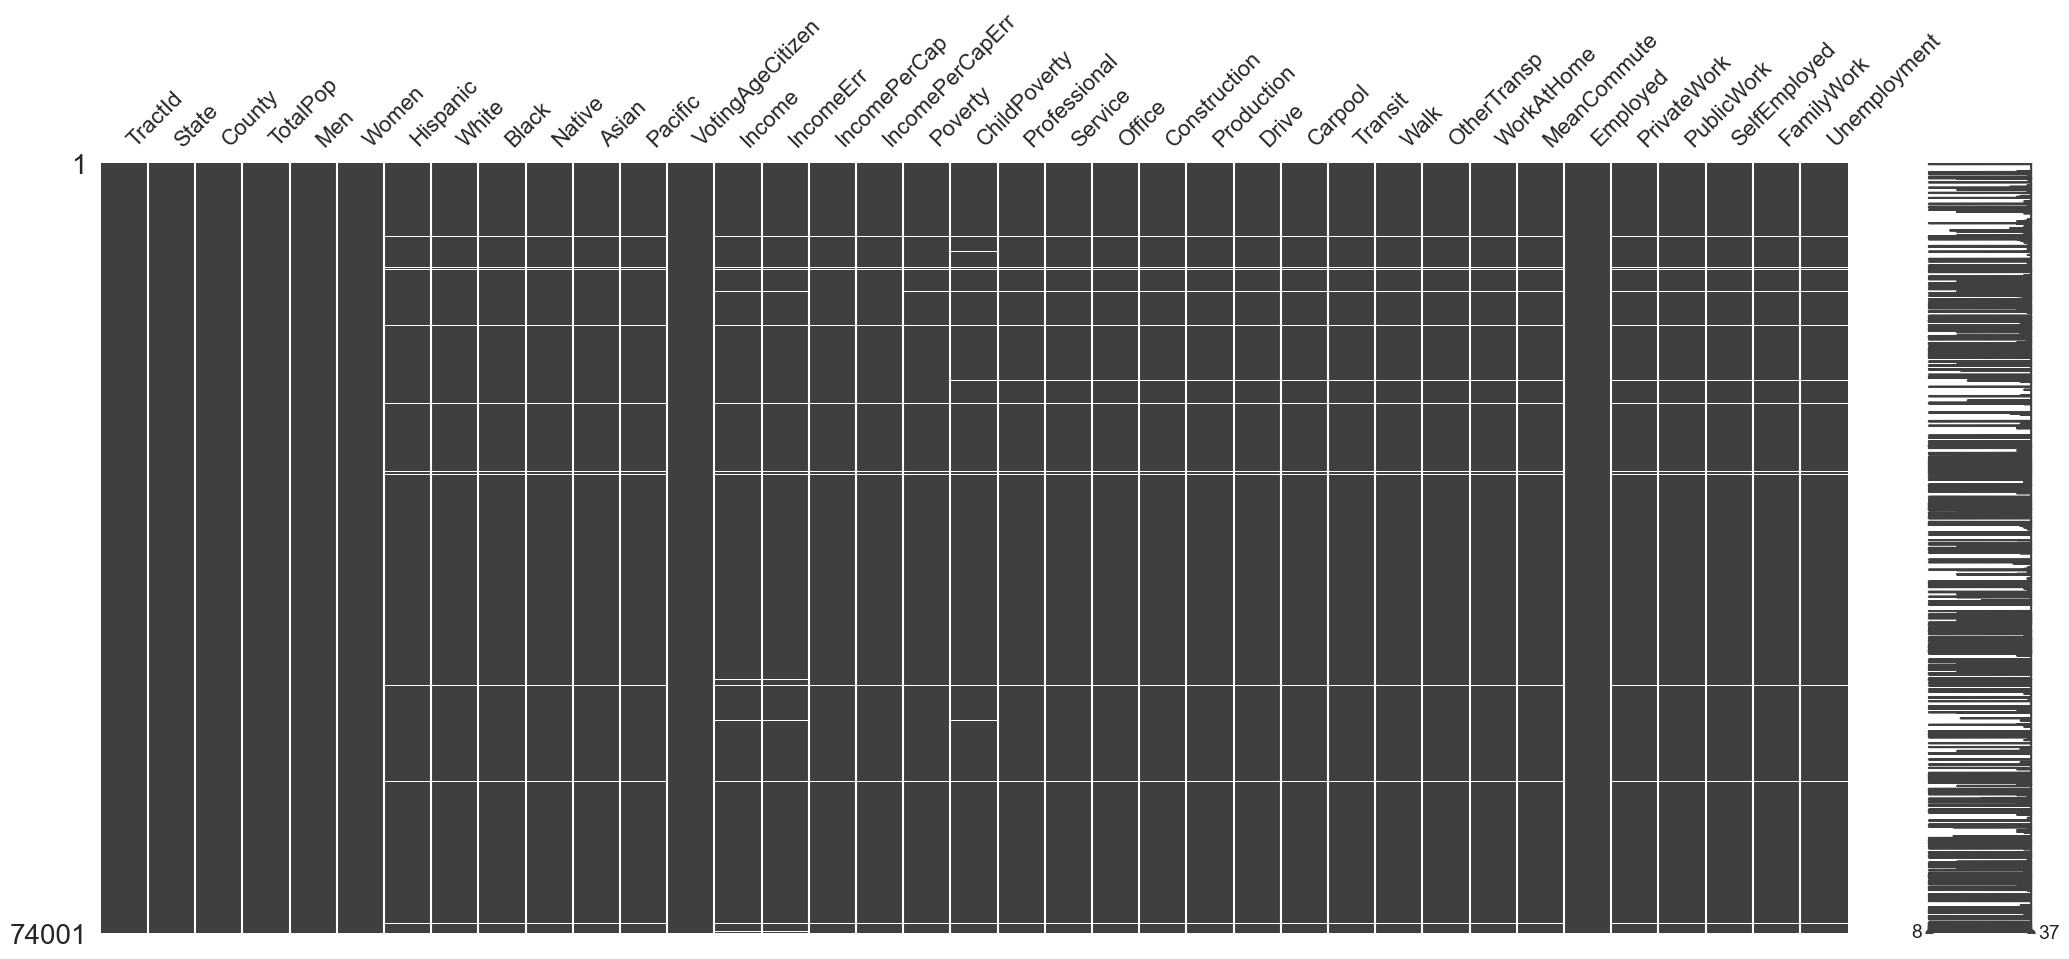

In [119]:
# Show missing data
msno.matrix(df)

#### Removing Observations with Missing Data

<Axes: >

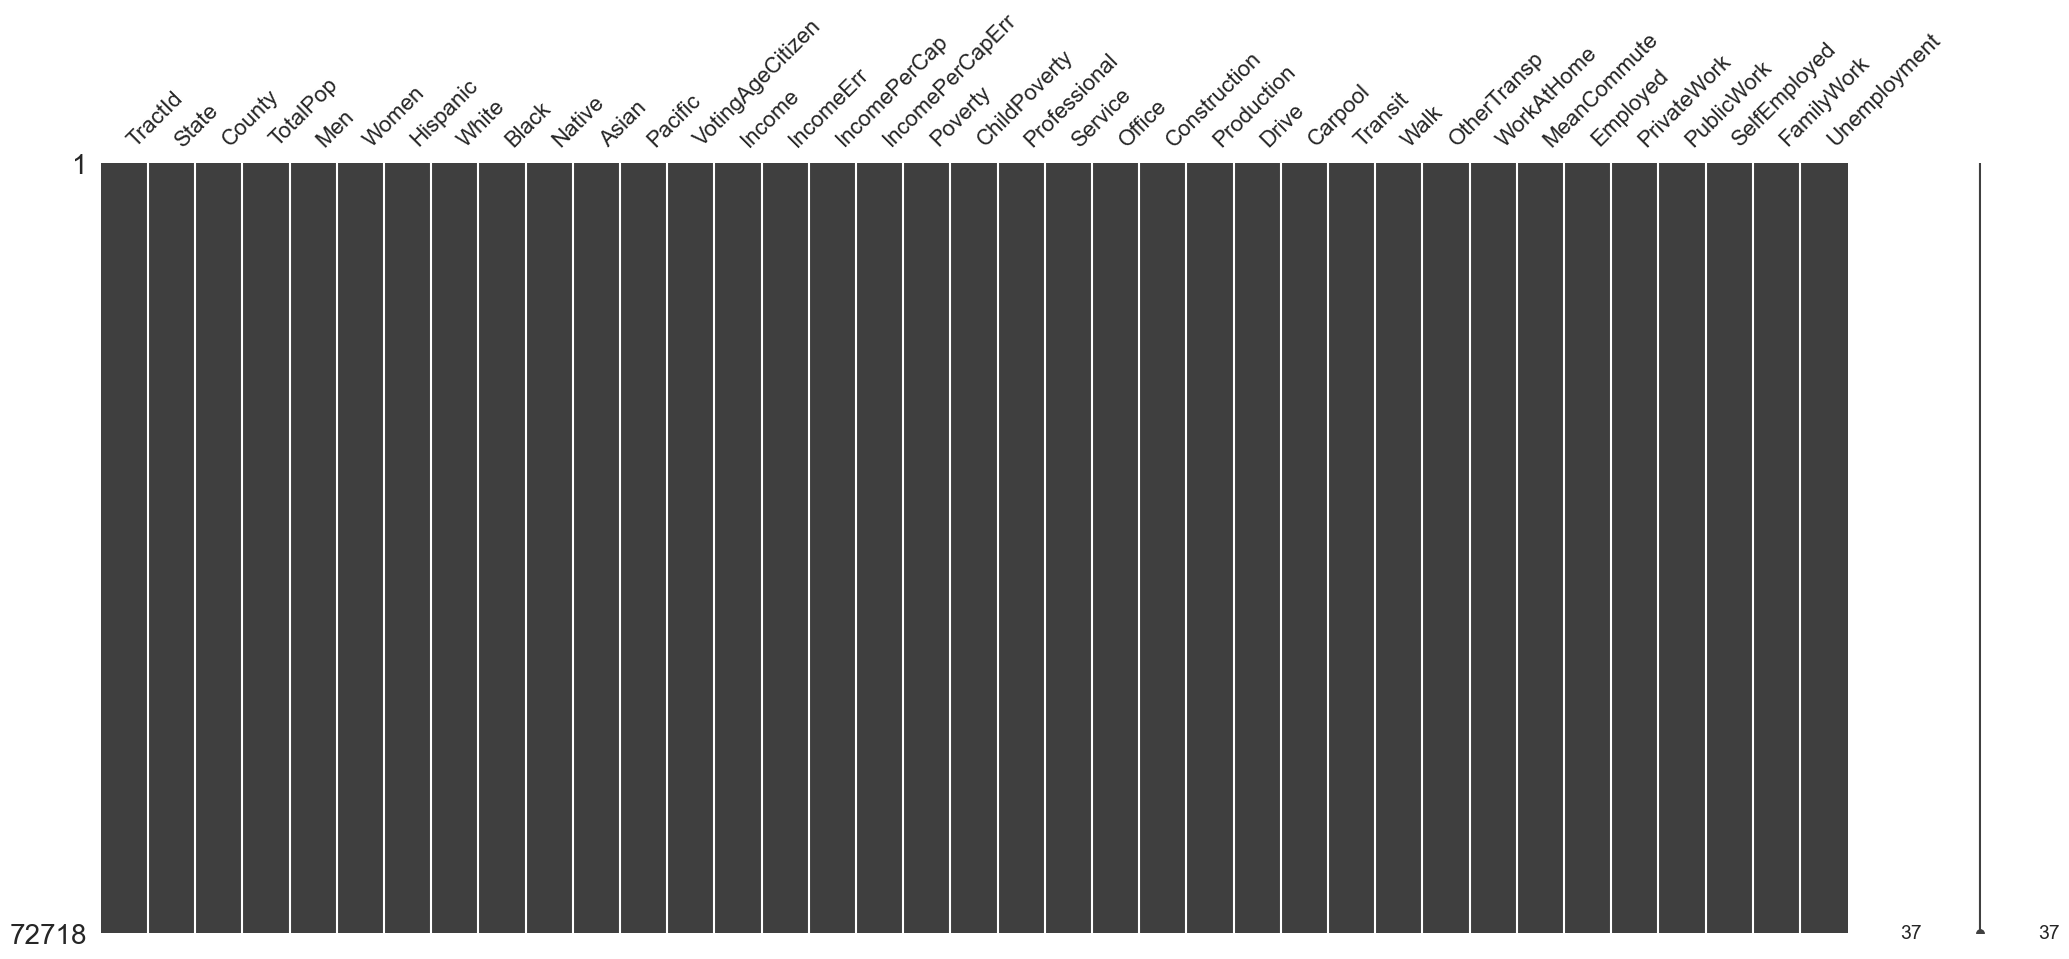

In [122]:
# Drop missing data
df_cleaned = df.dropna()

# Verify missing data dropped
msno.matrix(df_cleaned)

In [124]:
# Resetting the index
df_cleaned = df_cleaned.reset_index(drop=True)

In [126]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72718 entries, 0 to 72717
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float6

#### Encoding String Data as Integers

In [129]:
# Check unique values before encoding
df_cleaned["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [131]:
# Encoding State
le = LabelEncoder()

# Fit and transform
df_cleaned["State"] = le.fit_transform(df_cleaned["State"])

# Check transformed values
df_cleaned["State"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       39])

In [133]:
# Count unique values for county
df_cleaned["County"].nunique()

1954

#### Dropping Attributes

In [136]:
df_cleaned = df_cleaned.drop(['TractId', 'County'], axis= 1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72718 entries, 0 to 72717
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int64  
 1   TotalPop          72718 non-null  int64  
 2   Men               72718 non-null  int64  
 3   Women             72718 non-null  int64  
 4   Hispanic          72718 non-null  float64
 5   White             72718 non-null  float64
 6   Black             72718 non-null  float64
 7   Native            72718 non-null  float64
 8   Asian             72718 non-null  float64
 9   Pacific           72718 non-null  float64
 10  VotingAgeCitizen  72718 non-null  int64  
 11  Income            72718 non-null  float64
 12  IncomeErr         72718 non-null  float64
 13  IncomePerCap      72718 non-null  float64
 14  IncomePerCapErr   72718 non-null  float64
 15  Poverty           72718 non-null  float64
 16  ChildPoverty      72718 non-null  float6

#### Reasons for Dropping Attributes

1. **Dropping `County`:**
   - We chose to drop the `County` variable because it contains **1954 unique values**. Retaining this attribute and applying one-hot encoding would significantly increase the dimensionality of our dataset, leading to high memory consumption and potential difficulties in model training. The large number of unique values could also introduce noise and reduce the model's ability to generalize.

2. **Dropping `TractID`:**
   - We decided to drop the `TractID` variable as it serves merely as a **unique identifier** for each tract. It does not provide meaningful information relevant to our predictive modeling task. Including this attribute could lead to overfitting, where the model learns specific patterns tied to tract IDs rather than generalizable trends in the data.

### 1.2 Splitting & Balancing the Dataset

In [140]:
df_cleaned['ChildPoverty'].describe()

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

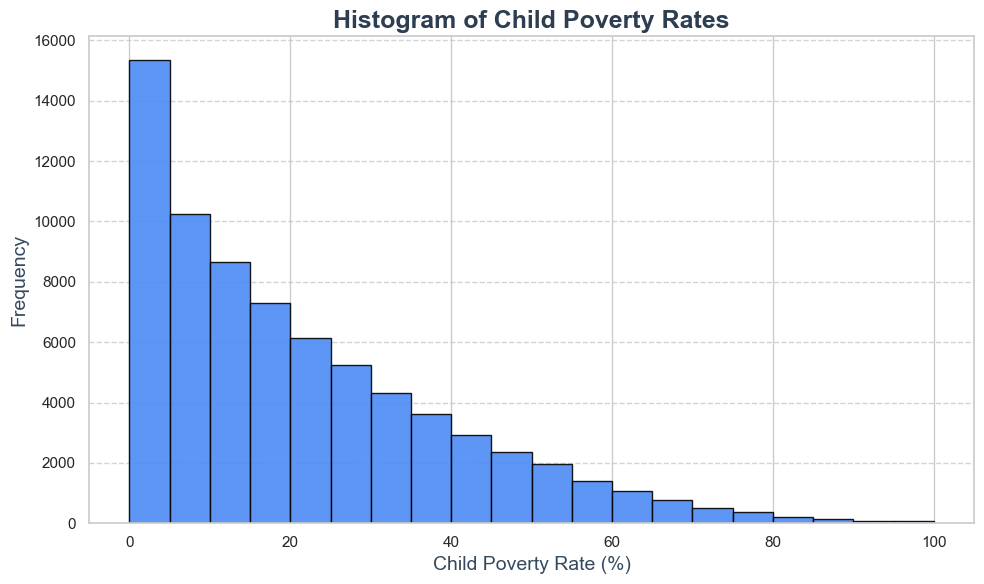

In [142]:
# Set the style for the plot
sns.set(style='whitegrid')

# Creating the histogram with a different color and style
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['ChildPoverty'], bins=20, color='#4c8bf5', edgecolor='black', alpha=0.9)

# Adding titles and labels
plt.title('Histogram of Child Poverty Rates', fontsize=18, fontweight='bold', color='#2c3e50')
plt.xlabel('Child Poverty Rate (%)', fontsize=14, color='#34495e')
plt.ylabel('Frequency', fontsize=14, color='#34495e')

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#bdc3c7')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

According to the US census (source: https://www.census.gov/library/stories/2022/10/poverty-rate-varies-by-age-groups.html), the national child poverty rate stands at 16.9%, with significant variation among states. For example, Utah has one of the lowest rates at 8.1%, while Mississippi reports one of the highest at 27.7%.

To address this range, we have established three quantization thresholds:

- 8.2% to represent the lowest rate,
- 16.9% as the national average,
- 27.7% for the highest rate of child poverty.
  
This quantization approach effectively reflects the varying levels of child poverty across the states, capturing both extremes and the national trend.

#### Balancing the Dataset

In [146]:
# Define the bins based on the custom thresholds and add infinity for the last range
bins = [-np.inf, 8.2, 16.9, 27.7, np.inf]

# Define corresponding labels for each group
labels = [0, 1, 2, 3]

# Using pd.cut() to categorize 'ChildPoverty' based on custom thresholds
df_cleaned['ChildPoverty'] = pd.cut(df_cleaned['ChildPoverty'], bins=bins, labels=labels)

# Check the distribution after binning and sort by class labels
print(df_cleaned['ChildPoverty'].value_counts().sort_index())

ChildPoverty
0    22415
1    14908
2    13467
3    21928
Name: count, dtype: int64


### Reasoning for Method Balancing
- We implemented quantization with custom thresholds to balance the ChildPoverty variable, leveraging meaningful real-world values (8.2%, 16.9%, and 27.7%). These thresholds align with important national benchmarks, helping us categorize the data into four interpretable classes:
    1. Low Poverty: Below 8.2%
    2. Average Poverty: 8.2% to 16.9%
    3. High Poverty: 16.9% to 27.7%
    4. Very High Poverty: Above 27.7%
- This approach enhances contextual relevance compared to arbitrary statistical quartiles, which might not capture the real-world significance of poverty rates. While the number of instances across classes might not be perfectly balanced, the method ensures that the categories reflect meaningful differences.
- Using real-world thresholds also helps mitigate the bias that may arise from purely statistical quantization methods, such as quartiles or deciles, which may not align with significant child poverty patterns.

#### Splitting the Dataset

In [150]:
# Define X features and Y target
y = df_cleaned['ChildPoverty']
df_cleaned.drop(['ChildPoverty'], axis=1, inplace=True)
X = df_cleaned 

# 80/20 split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Shapes for the Splits
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58174, 34)
(58174,)
(14544, 34)
(14544,)


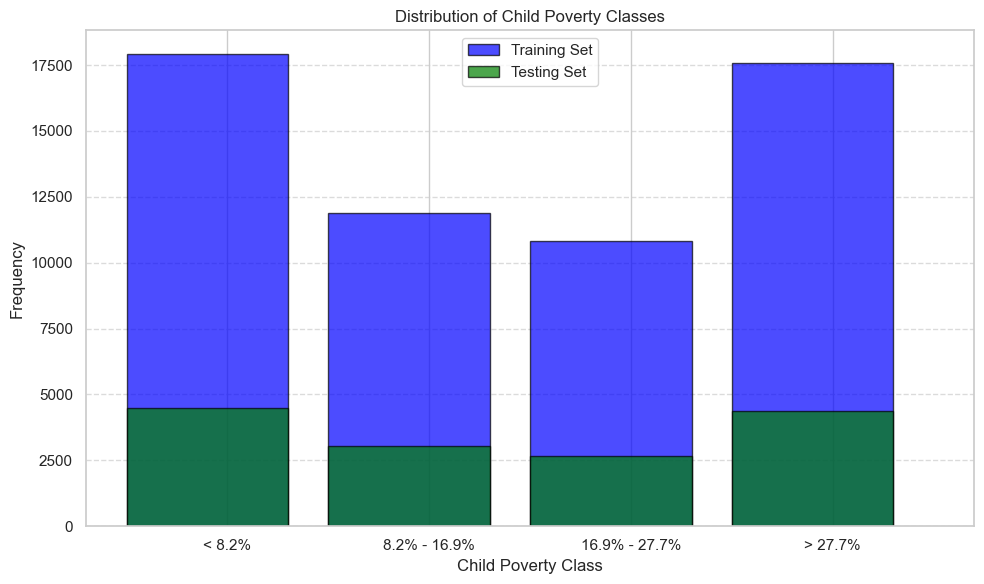

In [154]:
# Sets figure size
plt.figure(figsize=(10, 6))

# Defines the bin edges to ensure proper alignment with the ticks
bins = np.array([-0.5, 0.5, 1.5, 2.5, 3.5])  # Creates bins that match the classes

# Sets the width of the bars
bar_width = 0.8  # Wider bar width for better alignment

# Plots histograms for both training and testing sets
plt.hist(y_train, bins=bins, width=bar_width, alpha=0.7, label='Training Set', color='blue', edgecolor='black', align='mid')
plt.hist(y_test, bins=bins, width=bar_width, alpha=0.7, label='Testing Set', color='green', edgecolor='black', align='mid')

# Customizes the plot
plt.title('Distribution of Child Poverty Classes')
plt.xlabel('Child Poverty Class')
plt.ylabel('Frequency')

# Sets x-ticks to match the center of the bins
plt.xticks(ticks=[0, 1, 2, 3], labels=['< 8.2%', '8.2% - 16.9%', '16.9% - 27.7%', '> 27.7%'])

# Adds legend
plt.legend()

# Adds grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusts layout for better spacing
plt.tight_layout()
plt.show()

In [156]:
# Shows the percentage of each quantile in the dataset in the training set and in the testing set
print("Train Set:")
print(y_train.value_counts(normalize=True) * 100)
print("Test Set:")
print(y_test.value_counts(normalize=True) * 100)

Train Set:
ChildPoverty
0    30.798982
3    30.211091
1    20.404304
2    18.585622
Name: proportion, dtype: float64
Test Set:
ChildPoverty
0    30.926843
3    29.929868
1    20.888339
2    18.254950
Name: proportion, dtype: float64


### Class Proportions in Training and Testing Sets

- **1. Balanced Distribution**:
    - The proportions of classes in both the training and testing sets are relatively close. This ensures that both sets maintain a similar distribution of ChildPoverty classes. A balanced distribution is crucial for the model's performance, as it ensures the training data provides a representative sample for what the model will encounter during testing.

- **2. Class Distribution Observations**:
    - Class 0 (Lowest child poverty) and Class 3 (Highest child poverty) have the highest proportions in both sets, indicating that these categories are more common in the dataset.
    - Class 1 (Average child poverty) and Class 2 (Above average child poverty) appear less frequently, suggesting that these classes may be less prevalent in the overall data.

- **3. Implications for Model Training**:
    - Since the training set has a good representation of all classes, the model is less likely to become biased towards the majority classes (e.g., Class 0 or Class 3). This helps the model generalize better.
    - The similar class distribution in the testing set ensures that the model's performance evaluation is fair and not skewed by any class imbalance, reflecting real-world conditions accurately.

# **2. Pre-processing and Initial Modeling**

#### Pre-processing and Initial Modeling (**2.5 points total**)
- You will be using a two layer perceptron from class for the next few parts of the rubric. 
- There are several versions of the two layer perceptron covered in class, with example code. 
- When selecting an example two layer network from class be sure that you use: 
    - (1) vectorized gradient computation, 
    - (2) mini-batching, 
    - (3) cross entropy loss, and 
    - (4) proper Glorot initialization, at a minimum. 
    - There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate).
    - It is recommended to use sigmoids throughout the network, but not required.



### 2.1 Two Layer Perceptron


- [**.5 points**] 
    - Use the example two-layer perceptron network from the class example and quantify performance using accuracy. 
    - Do not normalize or one-hot encode the data (not yet). 
    - Be sure that training converges by graphing the loss function versus the number of epochs. 

In [175]:
# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase:
    def __init__(self, n_hidden=30, C=0.0, epochs=500, eta=0.001, 
                 random_state=None, shuffle=True, minibatches=1):
        np.random.seed(random_state)
        self.n_hidden = n_hidden          # Number of hidden neurons
        self.l2_C = C                     # L2 regularization parameter
        self.epochs = epochs              # Number of epochs for training
        self.eta = eta                    # Learning rate
        self.shuffle = shuffle            # Shuffle data each epoch
        self.minibatches = minibatches    # Number of mini batches

    # Encode class labels into one-hot representation
    @staticmethod
    def _encode_labels(y):
        return pd.get_dummies(y).values.T

    # Initialize weights using small random values
    def _initialize_weights(self):
        W1 = np.random.uniform(-1.0, 1.0, size=(self.n_hidden, self.n_features_))
        b1 = np.zeros((self.n_hidden, 1))

        W2 = np.random.uniform(-1.0, 1.0, size=(self.n_output_, self.n_hidden))
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2

    # Compute the sigmoid function
    @staticmethod
    def _sigmoid(z):
        return expit(z)

    # Compute L2 regularization cost
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        return lambda_ * (np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))

    # Compute the cross-entropy loss with L2 regularization
    def _cost(self, A3, Y_enc, W1, W2):
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3))))
        return cost + self._L2_reg(self.l2_C, W1, W2)

In [180]:
# A two-layer perceptron with mini-batch gradient descent,backpropagation, and Glorot initialization
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def __init__(self, **kwargs):
        # Initialize using the base class constructor
        super().__init__(**kwargs)
        self.alpha = kwargs.get('alpha', 0.1)  # Learning rate decay factor
        self.decrease_const = kwargs.get('decrease_const', 0.0)  # Decreasing rate of eta

    # Initialize weights using Glorot initialization
    def _initialize_weights(self):
        init_bound = 4 * np.sqrt(6.0 / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound, (self.n_hidden, self.n_features_ + 1))
        W1[:, :1] = 0  # No bias regularization

        init_bound = 4 * np.sqrt(6.0 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden + 1))
        W2[:, :1] = 0  # No bias regularization

        return W1, W2

    # Add a bias unit to the input matrix
    @staticmethod
    def _add_bias_unit(X, how='column'):
        if how == 'column':
            return np.hstack((np.ones((X.shape[0], 1)), X))
        elif how == 'row':
            return np.vstack((np.ones((1, X.shape[1])), X))

    # Compute the forward pass through the network
    def _feedforward(self, X, W1, W2):
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    # Compute the gradients for backpropagation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        V2 = A3 - Y_enc
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        grad1 = V1[1:, :] @ A1.T
        grad2 = V2 @ A2.T

        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

    # Train the model using mini-batch gradient descent
    def fit(self, X, y, print_progress=0, XY_test=None):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        self.score_ = [accuracy_score(y_data, self.predict(X_data))]

        if XY_test:
            X_test, y_test = XY_test
            self.val_score_ = [accuracy_score(y_test, self.predict(X_test))]

        for epoch in range(self.epochs):
            if print_progress and (epoch + 1) % print_progress == 0:
                print(f'Epoch: {epoch + 1}/{self.epochs}')

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[idx], Y_enc[:, idx]

            mini_batches = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            for batch_idx in mini_batches:
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[batch_idx], self.W1, self.W2)
                cost = self._cost(A3, Y_enc[:, batch_idx], self.W1, self.W2)
                mini_cost.append(cost)

                grad1, grad2 = self._get_gradient(A1, A2, A3, Z1, Z2, Y_enc[:, batch_idx], self.W1, self.W2)
                self.W1 -= self.eta * grad1
                self.W2 -= self.eta * grad2

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))

            if XY_test:
                self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))

        return self

    # Predict class labels for the input data
    def predict(self, X):
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        return np.argmax(A3, axis=0)

Epoch: 10/200
Epoch: 20/200
Epoch: 30/200
Epoch: 40/200
Epoch: 50/200
Epoch: 60/200
Epoch: 70/200
Epoch: 80/200
Epoch: 90/200
Epoch: 100/200
Epoch: 110/200
Epoch: 120/200
Epoch: 130/200
Epoch: 140/200
Epoch: 150/200
Epoch: 160/200
Epoch: 170/200
Epoch: 180/200
Epoch: 190/200
Epoch: 200/200


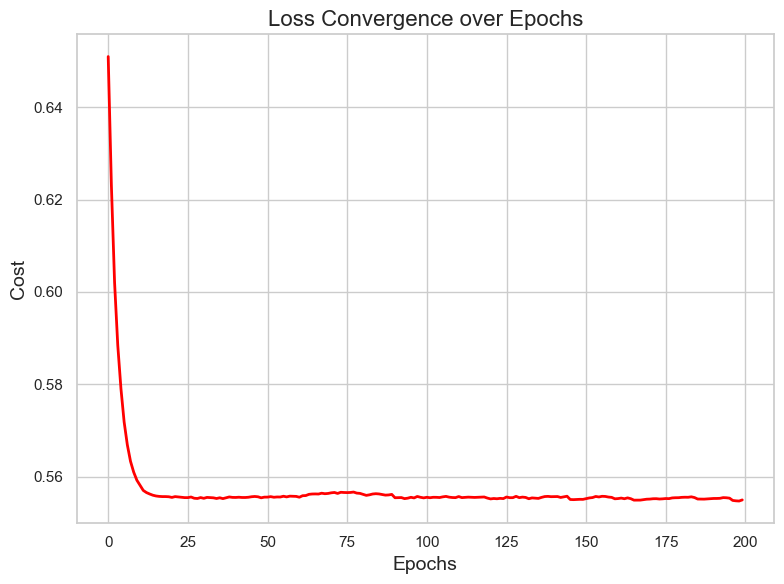

Accuracy: 0.2993


In [184]:
# Set parameters for TwoLayerPerceptron
params = dict(
    n_hidden=50,                      # Number of hidden units
    C=0.1,                            # L2 regularization parameter
    epochs=200,                        # Number of epochs
    eta=0.001,                         # Learning rate
    minibatches=len(X_train) // 32,    # Number of mini-batches
    shuffle=True,                      # Shuffle data before each epoch
    random_state=1                     # Seed for reproducibility
)

# Instantiate and train the model
non_normalized_model = TwoLayerPerceptron(**params)
non_normalized_model.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=10)

# Plot the loss after training
cost_avgs_non_normalized = [np.mean(epoch_cost) for epoch_cost in non_normalized_model.cost_]

plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_avgs_non_normalized)), cost_avgs_non_normalized, color='red', linewidth=2)
plt.title('Loss Convergence over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict and evaluate accuracy
y_pred = non_normalized_model.predict(X_test.to_numpy())
accuracy_non_normalized_model = accuracy_score(y_test.to_numpy(), y_pred)
print(f'Accuracy: {accuracy_non_normalized_model:.4f}')

### 2.2 Normalizing Continuous Numeric Feature Data


- [**.5 points**] 
    - Now (1) normalize the continuous numeric feature data. 
    - Use the example two-layer perceptron network from the class example and quantify performance using accuracy. 
    - Be sure that training converges by graphing the loss function versus the number of epochs.



In [186]:
# Initialize the scaler
scaler = StandardScaler()

# Specify the continuous features to normalize, excluding 'State'
normalized_features = [col for col in X_train.columns if col != 'State']

# Normalize the training data
X_train[normalized_features] = scaler.fit_transform(X_train[normalized_features])

# Use the same transformation on the test data
X_test[normalized_features] = scaler.transform(X_test[normalized_features])

Epoch: 10/200
Epoch: 20/200
Epoch: 30/200
Epoch: 40/200
Epoch: 50/200
Epoch: 60/200
Epoch: 70/200
Epoch: 80/200
Epoch: 90/200
Epoch: 100/200
Epoch: 110/200
Epoch: 120/200
Epoch: 130/200
Epoch: 140/200
Epoch: 150/200
Epoch: 160/200
Epoch: 170/200
Epoch: 180/200
Epoch: 190/200
Epoch: 200/200


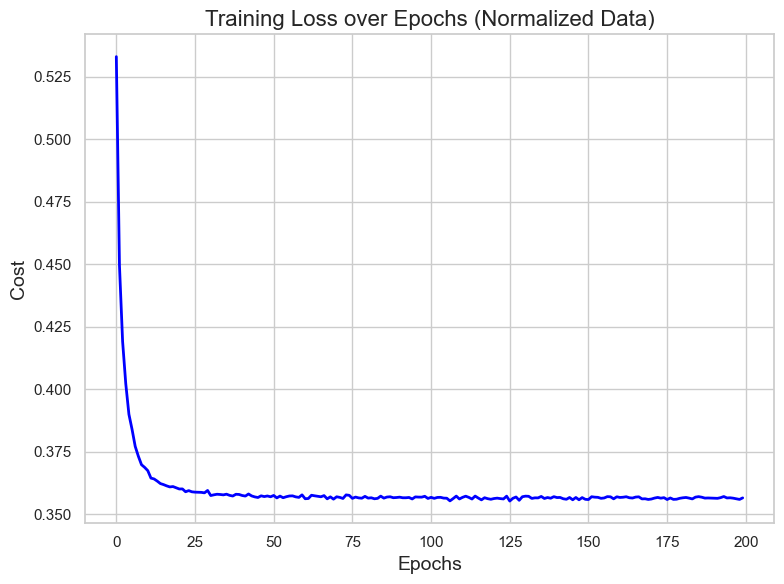

Accuracy with Normalized Data: 0.6755


In [188]:
# Set parameters for TwoLayerPerceptron
params = dict(
    n_hidden=50,                       # Number of hidden units
    C=0.1,                             # L2 regularization parameter
    epochs=200,                        # Number of epochs
    eta=0.001,                         # Learning rate
    minibatches=len(X_train) // 32,    # Number of mini-batches
    shuffle=True,                      # Shuffle data before each epoch
    random_state=1                     # Seed for reproducibility
)

# Instantiate and train the normalized model
normalized_model = TwoLayerPerceptron(**params)
normalized_model.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=10)

# Plot the loss after training
cost_avgs_normalized = [np.mean(epoch_cost) for epoch_cost in normalized_model.cost_]

plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_avgs_normalized)), cost_avgs_normalized, color='blue', linewidth=2)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Training Loss over Epochs (Normalized Data)', fontsize=16)
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()
plt.show()

# Predict on the test data and quantify performance
y_pred = normalized_model.predict(X_test.to_numpy())
accuracy_normalized_model = accuracy_score(y_test.to_numpy(), y_pred)

# Print the accuracy
print(f'Accuracy with Normalized Data: {accuracy_normalized_model:.4f}')

### 2.3 Normalizing Continuous Numeric Feature Data & One Hot Encoding Categorical Data

- [**.5 points**] 
    - Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. 
    - Use the example two-layer perceptron network from the class example and quantify performance using accuracy. 
    - Be sure that training converges by graphing the loss function versus the number of epochs. 


In [206]:
# One-hot encode the 'State' column if it exists
def one_hot_encode_state(X):
    if 'State' in X.columns:
        state_encoded = pd.get_dummies(X['State'], prefix='State')
        X = pd.concat([X.drop('State', axis=1), state_encoded], axis=1)
    return X

X_train = one_hot_encode_state(X_train)
X_test = one_hot_encode_state(X_test)

# 2. Convert all column names to strings to avoid type errors
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# 3. Ensure both datasets have the same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4. Convert boolean columns to integers
bool_columns = X_train.select_dtypes(include='bool').columns
X_train[bool_columns] = X_train[bool_columns].astype(int)
X_test[bool_columns] = X_test[bool_columns].astype(int)

# 5. Normalize the continuous numeric features
scaler = StandardScaler()
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler on training data and transform both train and test data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# 6. Convert DataFrames to NumPy arrays for compatibility with the model
X_train = X_train.to_numpy().astype(float)  # Ensure float type for calculations
y_train = y_train.to_numpy().astype(int)    # Ensure int type for classification
X_test = X_test.to_numpy().astype(float)
y_test = y_test.to_numpy().astype(int)

Epoch: 10/200
Epoch: 20/200
Epoch: 30/200
Epoch: 40/200
Epoch: 50/200
Epoch: 60/200
Epoch: 70/200
Epoch: 80/200
Epoch: 90/200
Epoch: 100/200
Epoch: 110/200
Epoch: 120/200
Epoch: 130/200
Epoch: 140/200
Epoch: 150/200
Epoch: 160/200
Epoch: 170/200
Epoch: 180/200
Epoch: 190/200
Epoch: 200/200


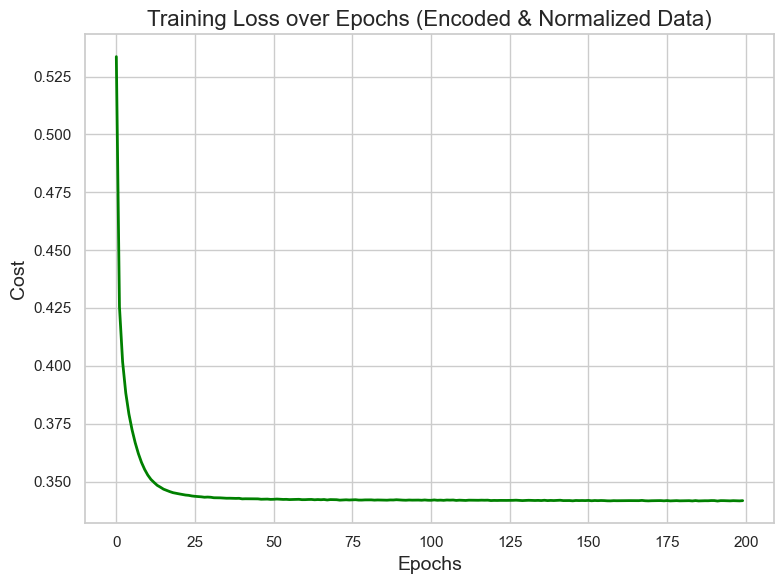

Accuracy with Encoded and Normalized Data: 0.6973


In [208]:
# Set parameters for TwoLayerPerceptron
params = dict(
    n_hidden=50,                       # Number of hidden units
    C=0.1,                             # L2 regularization parameter
    epochs=200,                        # Number of epochs
    eta=0.001,                         # Learning rate
    minibatches=len(X_train) // 32,    # Number of mini-batches
    shuffle=True,                      # Shuffle data before each epoch
    random_state=1                     # Seed for reproducibility
)

# Instantiate and train the model
encoded_normalized_model = TwoLayerPerceptron(**params)
encoded_normalized_model.fit(X_train, y_train, print_progress=10)

# Plot the loss after training
cost_avgs_encoded_normalized = [np.mean(epoch_cost) for epoch_cost in encoded_normalized_model.cost_]

plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_avgs_encoded_normalized)), cost_avgs_encoded_normalized, color='green', linewidth=2)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Training Loss over Epochs (Encoded & Normalized Data)', fontsize=16)
plt.grid(True)  # Add grid for readability
plt.tight_layout()
plt.show()

# Predict on the test data and quantify performance
y_pred = encoded_normalized_model.predict(X_test)
accuracy_encoded_normalized_model = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy with Encoded and Normalized Data: {accuracy_encoded_normalized_model:.4f}')

### 2.4 Comparing Performance of Three Models


- [**1 points**] 
    - Compare the performance of the three models you just trained. 
    - Are there any meaningful differences in performance? 
    - Explain, in your own words, why these models have (or do not have) different performances.  
    - *Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.*

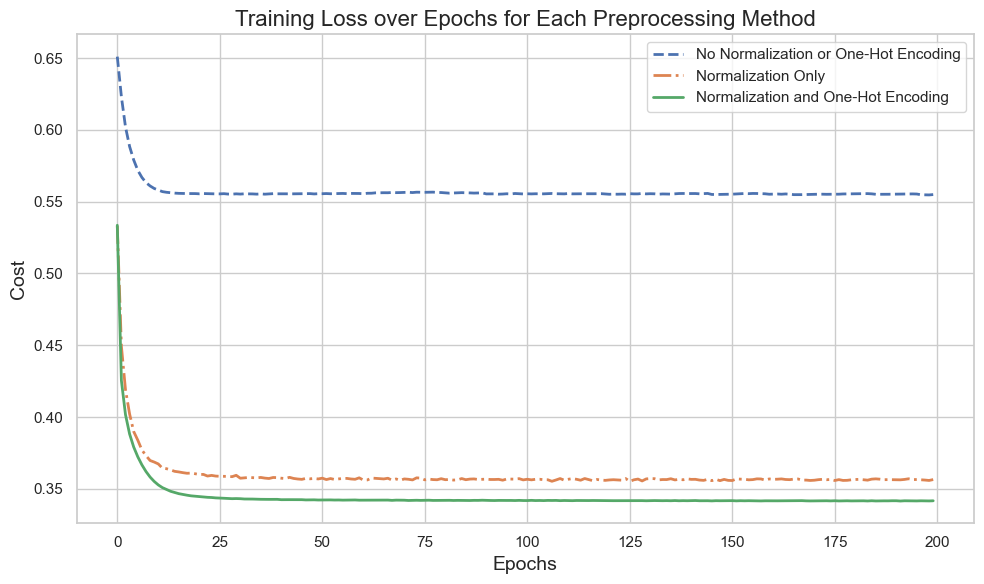

In [218]:
# Plotting all three loss curves on the same graph
plt.figure(figsize=(10, 6))

# Plot: Non-normalized and non-encoded model
plt.plot(range(len(cost_avgs_non_normalized)), cost_avgs_non_normalized, 
         label='No Normalization or One-Hot Encoding', linestyle='--', linewidth=2)

# Plot: Normalized only model
plt.plot(range(len(cost_avgs_normalized)), cost_avgs_normalized, 
         label='Normalization Only', linestyle='-.', linewidth=2)

# Plot: Normalized and one-hot encoded model
plt.plot(range(len(cost_avgs_encoded_normalized)), cost_avgs_encoded_normalized, 
         label='Normalization and One-Hot Encoding', linestyle='-', linewidth=2)

# Finalizing the plot
plt.ylabel('Cost', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.title('Training Loss over Epochs for Each Preprocessing Method', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True)  # Add grid for clarity
plt.tight_layout()
plt.show()

In [222]:
# Comparing Accuracy Among Models
print(f'Accuracy of Non-Normalized and Non-Encoded Model: {accuracy_non_normalized_model:.4f}')
print(f'Accuracy of Normalized Model: {accuracy_normalized_model:.4f}')
print(f'Accuracy of Normalized and Encoded Model: {accuracy_encoded_normalized_model:.4f}')

Accuracy of Non-Normalized and Non-Encoded Model: 0.2993
Accuracy of Normalized Model: 0.6755
Accuracy of Normalized and Encoded Model: 0.6973


The results show distinct differences in performance among the three models, with progressively better accuracy as preprocessing techniques were applied.

1. **No Normalization or One-Hot Encoding (Accuracy: 0.299)**  

This model shows the lowest accuracy, only marginally better than random guessing in a multi-class setting. Several factors contribute to this poor performance:

- Unscaled numeric features may have very different magnitudes, which disrupts gradient descent optimization. This makes it harder for the model to adjust weights uniformly across the feature space.
- Categorical features without one-hot encoding are treated as integers, implying false ordinal relationships (e.g., one state being "greater" than another). This misrepresentation hinders the model's ability to learn meaningful patterns from the data.

2. **Normalization Only (Accuracy: 0.6755)**  
  The model's accuracy improves significantly with normalization:

- Numeric features are scaled to the same range, making gradient updates more stable and consistent across features.
- This stabilization allows the model to converge faster and learn more effectively from the input data.
- However, the lack of one-hot encoding still limits performance, as the categorical features are treated as ordinal, potentially distorting the model's understanding of the data.

3. **Normalization and One-Hot Encoding (Accuracy: 0.6973)**  
  This model achieves the best performance by combining normalization and one-hot encoding:

One-hot encoding ensures that categorical variables are properly represented without implying any order. This preserves the true nature of these variables.
Normalization allows the model to leverage numeric features effectively by ensuring consistent weight updates across features.
With both preprocessing techniques applied, the model can fully utilize the available information, leading to the highest accuracy.

**In Summary:**  
The different preprocessing techniques directly impact model performance by improving feature scaling and representation. Normalization stabilizes training, and one-hot encoding allows categorical data to contribute meaningfully, preventing ordinal assumptions. This leads to a higher accuracy in the normalized and encoded model.
